<a href="https://colab.research.google.com/github/Aidan-Lopez/Mindustry/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


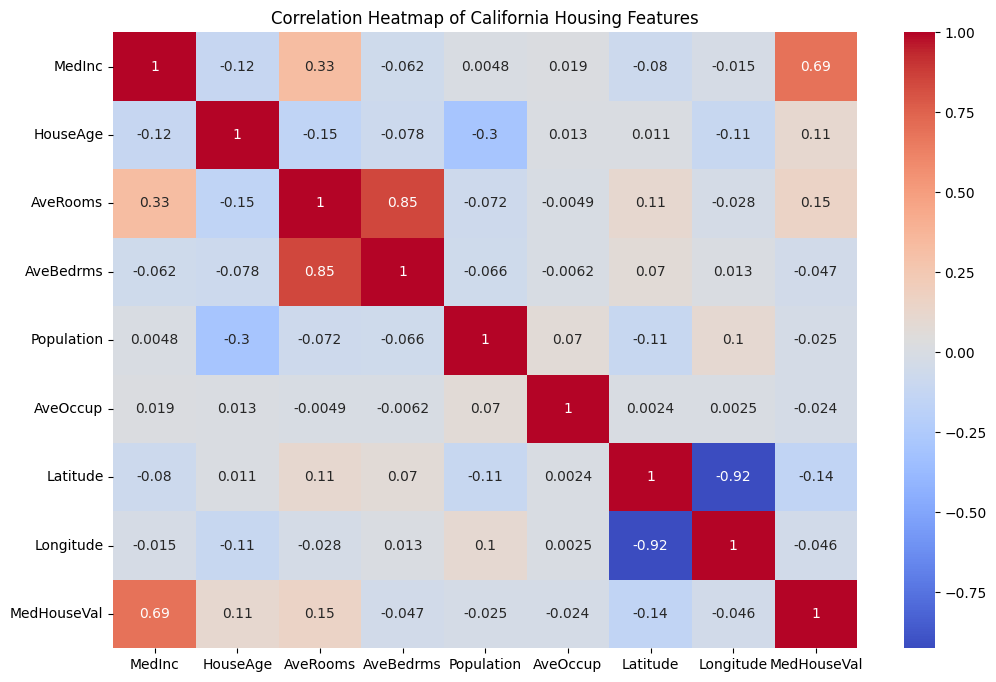

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of California Housing Features")
plt.show()


In [ ]:
#standardizing my data
scaler = StandardScaler()
data = df[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude']]
data_scaled = scaler.fit_transform(data)

target = df['MedInc']

X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)


In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def train(self, X, y, learning_rate=0.001, epochs=1000, batch_size=32):
        X = np.array(X)
        y = np.array(y)

        if X.shape[0] != y.shape[0]:
            raise ValueError(f"Mismatch in number of samples: X has {X.shape[0]} and y has {y.shape[0]}")

        m, n = X.shape

        self.weights = np.random.randn(n, 1)
        self.bias = 0

        for epoch in range(epochs):
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]

                y_pred = np.dot(X_batch, self.weights) + self.bias

                error = y_pred - y_batch.reshape(-1, 1)

                dw = (2 / batch_size) * np.dot(X_batch.T, error)
                db = (2 / batch_size) * np.sum(error)

                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db

            if epoch % 100 == 0:
                loss = np.mean(error ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias


In [ ]:
#model
linear_model = LinearRegression()
linear_model.train(X_train, y_train, learning_rate=0.001, epochs=1000, batch_size=32)

#predictions
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

# Calculate MSE for both training and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)


Epoch 0, Loss: 4.1112
Epoch 100, Loss: 0.8610
Epoch 200, Loss: 1.9816
Epoch 300, Loss: 0.8364
Epoch 400, Loss: 0.6297
Epoch 500, Loss: 0.4548
Epoch 600, Loss: 1.1944
Epoch 700, Loss: 1.7684
Epoch 800, Loss: 1.9179
Epoch 900, Loss: 2.1277
Training MSE: 1.4316069652562644
Test MSE: 1.5336918196329692


In [ ]:
import numpy as np

class PolynomialRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.weights = None
        self.bias = None

    def _polynomial_features(self, X):
        X_poly = np.hstack([X ** i for i in range(1, self.degree + 1)])
        return X_poly

    def train(self, X, y, learning_rate=0.001, epochs=1000, batch_size=32):
        X = np.array(X)
        y = np.array(y)

        X_poly = self._polynomial_features(X)

        self.weights = np.random.randn(X_poly.shape[1], 1)
        self.bias = 0

        m = X_poly.shape[0]

        for epoch in range(epochs):
            indices = np.random.permutation(m)
            X_poly_shuffled = X_poly[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_batch = X_poly_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]

                y_pred = np.dot(X_batch, self.weights) + self.bias

                error = y_pred - y_batch.reshape(-1, 1)

                dw = (2 / batch_size) * np.dot(X_batch.T, error)
                db = (2 / batch_size) * np.sum(error)

                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db

            if epoch % 100 == 0:
                loss = np.mean(error ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        X = np.array(X)
        X_poly = self._polynomial_features(X)
        return np.dot(X_poly, self.weights) + self.bias


In [ ]:
model = PolynomialRegression(degree=2)
model.train(X_train, y_train, learning_rate=0.001, epochs=1000, batch_size=128)

# Make predictions on training and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate MSE for both training and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

Epoch 0, Loss: 14822368761.5555


<ipython-input-7-a5262b38898b>:44: RuntimeWarning: overflow encountered in square
  loss = np.mean(error ** 2)
<ipython-input-7-a5262b38898b>:40: RuntimeWarning: invalid value encountered in subtract
  self.weights -= learning_rate * dw


Epoch 100, Loss: inf
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan


ValueError: Input contains NaN.

In [ ]:
import numpy as np

class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def train(self, X, y, learning_rate=0.001, epochs=1000, batch_size=32):
        X = np.array(X)
        y = np.array(y)
        m, n = X.shape

        self.weights = np.random.randn(n, 1)
        self.bias = 0

        for epoch in range(epochs):
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]

                y_pred = np.dot(X_batch, self.weights) + self.bias

                error = y_pred - y_batch.reshape(-1, 1)

                dw = (2 / batch_size) * np.dot(X_batch.T, error) + 2 * self.alpha * self.weights
                db = (2 / batch_size) * np.sum(error)

                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db

            if epoch % 100 == 0:
                loss = np.mean(error ** 2) + self.alpha * np.sum(self.weights ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias


In [ ]:
ridge_model = RidgeRegression(alpha=1.0)
ridge_model.train(X_train, y_train, learning_rate=0.001, epochs=1000, batch_size=16)

#predictions
train_predictions = ridge_model.predict(X_train)
test_predictions = ridge_model.predict(X_test)

# Calculate MSE for both training and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
